In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of ensemble models
ensemble_models = [
    ("RandomForest", RandomForestClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("GradientBoosting", GradientBoostingClassifier())
]

# Define hyperparameter grids for each ensemble
param_grids = {
    "RandomForest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1.0]
    },
    "GradientBoosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 4, 5]
    }
}

results = {}

# Loop through ensemble models and hyperparameters
for model_name, model in ensemble_models:
    param_grid = param_grids[model_name]
    
    # Create GridSearchCV for the current ensemble model
    grid_search = GridSearchCV(model, param_grid, cv=5)
    
    # Fit the model and find the best hyperparameters
    grid_search.fit(X_train, y_train)
    
    # Evaluate the model with the best hyperparameters
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {"best_params": grid_search.best_params_, "accuracy": accuracy}

# Compare results to find the best ensemble method and hyperparameters
best_ensemble = max(results, key=lambda x: results[x]["accuracy"])
best_params = results[best_ensemble]["best_params"]
best_accuracy = results[best_ensemble]["accuracy"]

print(f"Best Ensemble: {best_ensemble}")
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")


Best Ensemble: RandomForest
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 1.0


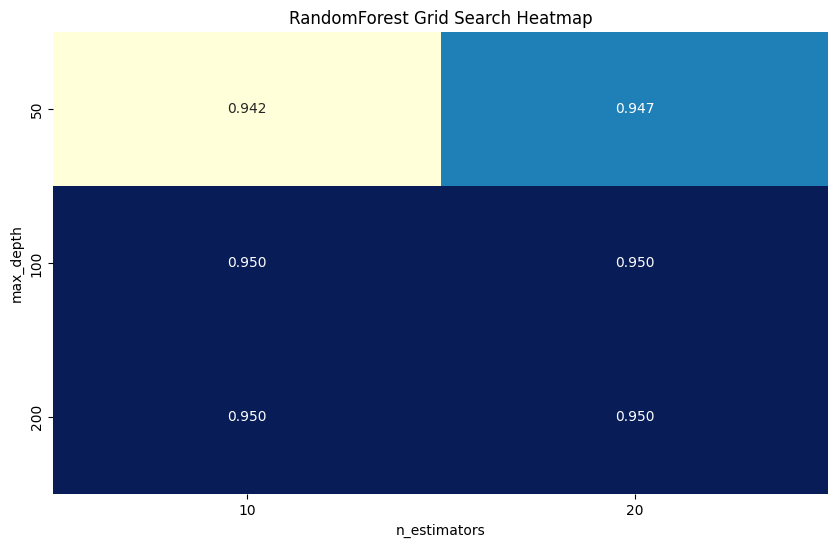

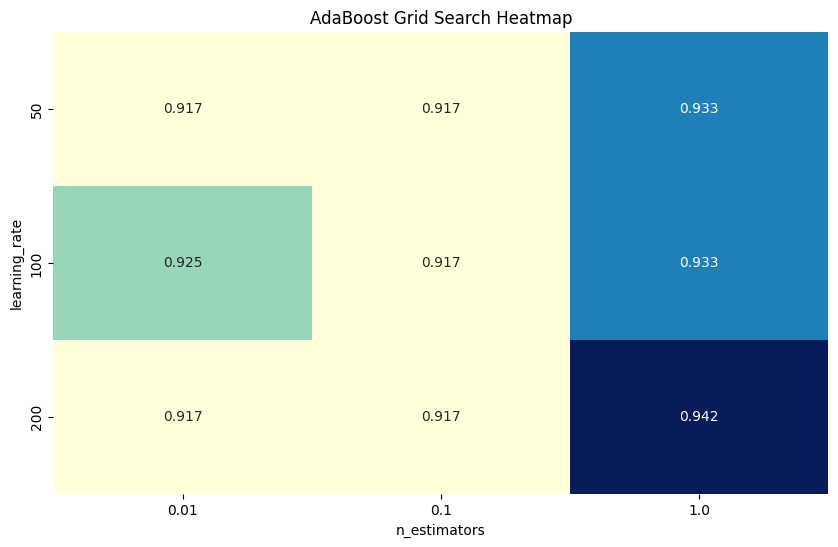

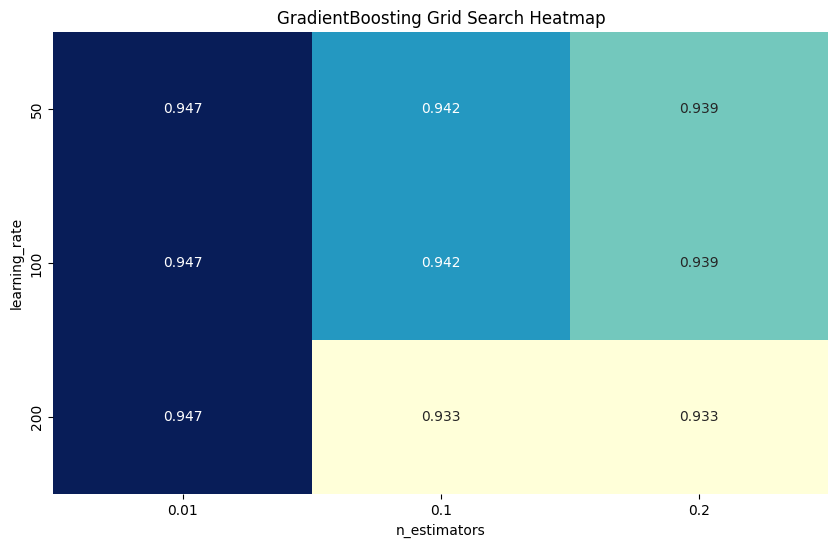

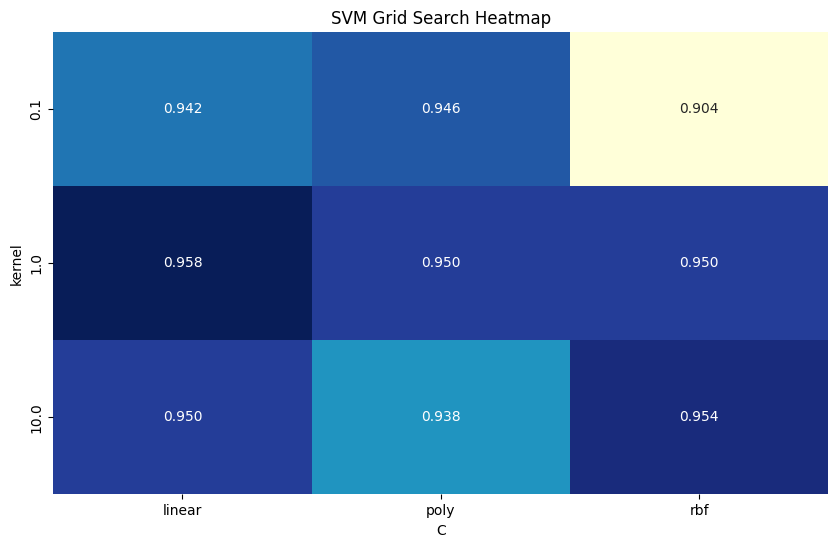

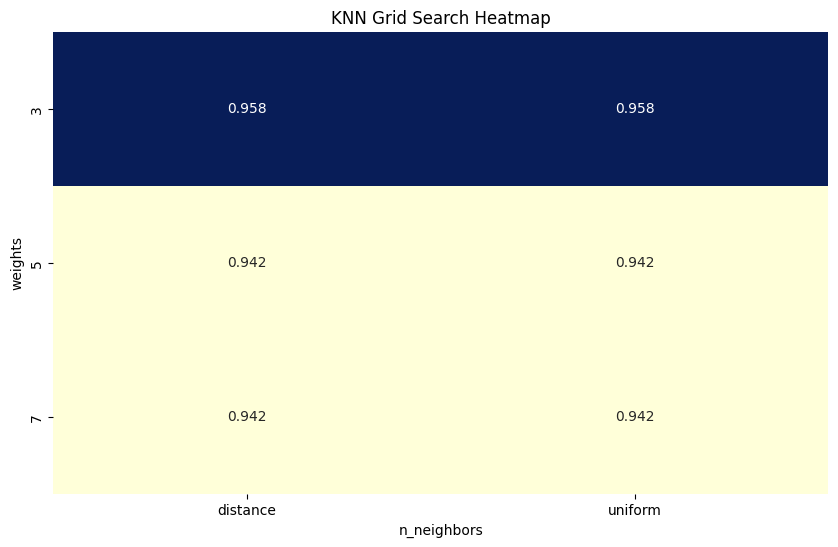

Best Model: RandomForest
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy: 1.0


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models with their respective hyperparameter grids
models = [
    ("RandomForest", RandomForestClassifier(), {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    }),
    ("AdaBoost", AdaBoostClassifier(), {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1.0]
    }),
    ("GradientBoosting", GradientBoostingClassifier(), {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 4, 5]
    }),
    ("SVM", SVC(), {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "poly", "rbf"],
        "gamma": ["scale", "auto"]
    }),
    ("KNN", KNeighborsClassifier(), {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    }),
    ("NaiveBayes", GaussianNB(), {})
]

results = {}

for model_name, model, param_grid in models:
    # Create GridSearchCV for the current ensemble model
    grid_search = GridSearchCV(model, param_grid, cv=5)
    
    # Fit the model and find the best hyperparameters
    grid_search.fit(X_train, y_train)
    
    # Evaluate the model with the best hyperparameters
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {"best_params": grid_search.best_params_, "accuracy": accuracy}
    
    # Create a heatmap to visualize the performance of different hyperparameter combinations
    if len(param_grid) > 0:
        param_names = list(param_grid.keys())
        x_label = param_names[0]
        y_label = param_names[1] if len(param_names) > 1 else "Parameter Y"
    
        plt.figure(figsize=(10, 6))
        sns.heatmap(
            data=pd.DataFrame(grid_search.cv_results_).pivot_table(
                index=f"param_{x_label}",
                columns=f"param_{y_label}",
                values="mean_test_score"
            ),
            annot=True,
            fmt=".3f",
            cmap="YlGnBu",
            cbar=False
        )
        plt.title(f"{model_name} Grid Search Heatmap")
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.show()

best_ensemble = max(results, key=lambda x: results[x]["accuracy"])
best_params = results[best_ensemble]["best_params"]
best_accuracy = results[best_ensemble]["accuracy"]

print(f"Best Model: {best_ensemble}")
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Titanic dataset (replace 'train.csv' with your dataset)
data = pd.read_csv('./Data/titanic_train.csv')  # You should replace 'train.csv' with your dataset

# Data preprocessing
# For simplicity, let's drop some columns and handle missing values
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Split the data into features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of ensemble models
ensemble_models = [
    ("RandomForest", RandomForestClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("GradientBoosting", GradientBoostingClassifier())
]

# Define hyperparameter grids for each ensemble
param_grids = {
    "RandomForest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10],
        "min_samples_split": [2, 5]
    },
    "AdaBoost": {
        "n_estimators": [50, 100],
        "learning_rate": [0.01, 0.1]
    },
    "GradientBoosting": {
        "n_estimators": [50, 100],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 4]
    }
}

results = {}

# Loop through ensemble models and hyperparameters
for model_name, model in ensemble_models:

    param_grid = param_grids[model_name]
    
    # Create GridSearchCV for the current ensemble model
    grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
    
    # Fit the model and find the best hyperparameters
    grid_search.fit(X_train, y_train)
    
    # Evaluate the model with the best hyperparameters
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {"best_params": grid_search.best_params_, "Accuracy": accuracy}

# Compare results to find the best ensemble method and hyperparameters
best_ensemble = max(results, key=lambda x: results[x]["Accuracy"])
best_params = results[best_ensemble]["best_params"]
best_accuracy = results[best_ensemble]["Accuracy"]

print(f"Best Ensemble: {best_ensemble}")
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

Best Ensemble: RandomForest
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy: 0.8435754189944135
